In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st


%matplotlib inline

In [300]:
df = pd.read_csv('client_old_new_df.csv')

In [301]:
df = df.dropna()
#merged_df = pd.read_csv('merged_df.csv')

Completion Rate:
The proportion of users who reach the final ‘confirm’ step.

Time Spent on Each Step:
The average duration users spend on each step.

Error Rates:
If there’s a step where users go back to a previous step, it may indicate confusion or an error. Moving from a later step to an earlier one should be considered an error.

<h1>Proportions of ALL Clients and Process Step</h1>

In [245]:
# Create crosstab between 'client_id' and 'process_step'
crosstab_process = pd.crosstab(df['client_id'], df['process_step'])

# Calculate the total number of unique users
total_users_all = len(crosstab_process)

# Define the process steps
process_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Initialize a dictionary to store the completion rates for each step
completion_rates = {}

# Iterate through each process step to calculate the completion rate
for step in process_steps:
    # Calculate the number of unique users who reached each step
    completed_users = (crosstab_process[step] > 0).sum()  # Count unique users who reached the step
    completion_rate = completed_users / total_users_all if total_users_all > 0 else 0  # Prevent division by zero
    completion_rates[step] = completion_rate * 100  # Store the completion rate as a percentage

# Print the completion rates for all steps
for step, rate in completion_rates.items():
    print(f"Completion Rate for '{step}': {rate:.2f}%")

# Calculate the overall completion rate for the 'confirm' step
overall_completion_rate = completion_rates['confirm']
print(f"Overall Completion Rate for 'confirm': {overall_completion_rate:.2f}%")

# Calculate the total number of unique users who reached the 'confirm' step
confirm_alluser = (crosstab_process['confirm'] > 0).sum()

# Print the total number of users who reached the 'confirm' step
print(f"Total users who reached the 'confirm' step: {confirm_alluser}")


Completion Rate for 'start': 99.16%
Completion Rate for 'step_1': 87.96%
Completion Rate for 'step_2': 81.01%
Completion Rate for 'step_3': 75.85%
Completion Rate for 'confirm': 67.57%
Overall Completion Rate for 'confirm': 67.57%
Total users who reached the 'confirm' step: 34121


In [246]:
completed_users

34121

<h1>Proportions of TEST Clients and Process Step</h1>

In [251]:
# Filter the DataFrame to include only rows where 'Variation' == 'Test'
df_filtered_yes = df[df['Variation'] == 'Test']

# Create a crosstab between 'client_id' and 'process_step' for the filtered users
crosstab_yes = pd.crosstab(df_filtered_yes['client_id'], df_filtered_yes['process_step'])

# Calculate the total number of unique users in the filtered data
total_users = len(crosstab_yes)

# Define the process steps
process_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Initialize a dictionary to store the completion rates
completion_rates_test = {}

# Iterate through each process step to calculate the completion rate
for step in process_steps:
    # Calculate the number of unique users who reached each step
    completed_users = (crosstab_yes[step] > 0).sum()  # Count unique users who reached the step
    completion_rate = completed_users / total_users if total_users > 0 else 0  # Prevent division by zero
    completion_rates_test[step] = completion_rate * 100  # Store the completion rate as a percentage

# Print the completion rates for all steps
for step, rate in completion_rates_test.items():
    print(f"Completion Rate for yes '{step}': {rate:.2f}%")

# Calculate the total number of unique users who reached the 'confirm' step
confirm_testuser = (crosstab_yes['confirm'] > 0).sum()

# Print the total number of users who reached the 'confirm' step
print(f"Total users who reached the 'confirm' step: {confirm_testuser}")


Completion Rate for yes 'start': 98.93%
Completion Rate for yes 'step_1': 89.98%
Completion Rate for yes 'step_2': 82.53%
Completion Rate for yes 'step_3': 77.43%
Completion Rate for yes 'confirm': 69.29%
Total users who reached the 'confirm' step: 18687


In [252]:
# Create a DataFrame from the completion rates dictionary
df_completion_rates_test = pd.DataFrame(list(completion_rates.items()), columns=['Process Step', 'Completion Rate'])

# Save it to a CSV for Tableau import
df_completion_rates_test.to_csv('completion_rates_test.csv', index=False)

<h1>Proportions of NON TEST Clients and Process Step</h1>

In [254]:
# Filter the DataFrame to include only rows where 'Variation' == 'Control
df_filtered_no = df[df['Variation'] == 'Control']

# Create a crosstab between 'client_id' and 'process_step' for the filtered users
crosstab_no = pd.crosstab(df_filtered_no['client_id'], df_filtered_no['process_step'])

# Calculate the total number of unique users in the filtered data
total_users = len(crosstab_no)

# Define the process steps
process_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Initialize a dictionary to store the completion rates
completion_rates_control = {}

# Iterate through each process step to calculate the completion rate
for step in process_steps:
    # Calculate the number of unique users who reached each step
    completed_users = (crosstab_no[step] > 0).sum()  # Count unique users who reached the step
    completion_rate = completed_users / total_users if total_users > 0 else 0  # Prevent division by zero
    completion_rates_control[step] = completion_rate * 100  # Store the completion rate as a percentage

# Print the completion rates for all steps
for step, rate in completion_rates_control.items():
    print(f"Completion Rate for no '{step}': {rate:.2f}%")

# Calculate the total number of unique users who reached the 'confirm' step
confirm_controluser = (crosstab_no['confirm'] > 0).sum()

# Print the total number of users who reached the 'confirm' step
print(f"Total users who reached the 'confirm' step: {confirm_controluser}")


Completion Rate for no 'start': 99.43%
Completion Rate for no 'step_1': 85.64%
Completion Rate for no 'step_2': 79.25%
Completion Rate for no 'step_3': 74.04%
Completion Rate for no 'confirm': 65.59%
Total users who reached the 'confirm' step: 15434


In [257]:
# Create a DataFrame from the completion rates dictionary
df_completion_rates_control = pd.DataFrame(list(completion_rates.items()), columns=['Process Step', 'Completion Rate'])

# Save it to a CSV for Tableau import
df_completion_rates_control.to_csv('completion_rates_control.csv', index=False)

<h1>Error Rate All User</h1>

#Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. 
#Moving from a later step to an earlier one should be considered an error.

In [261]:
# Convert date_time column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

#df = df.dropna()
# Manually define the mapping dictionary for 'process_step'
# Assigning specific numeric values to each step
mapping = {
    'start': 0,  
    'step_1': 1,  
    'step_2': 2,
    'step_3' : 3,
    'confirm' : 4
}

# Map the 'process_step' column using the defined mapping
df['process_step_numeric'] = df['process_step'].map(mapping)

# Sort the dataframe by client_id and date_time
df = df.sort_values(by=['client_id', 'date_time'])

# Create a new column to track if the user moved to a previous step
df['error'] = df.groupby('client_id')['process_step_numeric'].diff().apply(lambda x: x < 0)

# Filter rows where an error occurred
error_rows = df[df['error'] == True]

# Calculate the total error rate (number of errors / total steps)
total_errors = error_rows.shape[0]
total_steps = df.shape[0]
error_rate = total_errors / total_steps

print(f"Total Errors: {total_errors}")
print(f"Error Rate: {error_rate:.2%}")

## Total Errors are more than test + control errors because of NaN values, when dropping NaN values they add up to the same

Total Errors: 32423
Error Rate: 10.09%


In [17]:
df['client_id'].nunique()

50500

<h1>Average Duration by User for Steps</h1>

In [19]:
# Time Spent on Each Step: The average duration users spend on each step.

df['date_time'] = pd.to_datetime(df['date_time'])

# Create separate columns for date and time
#df['date'] = df['date_time'].dt.date
#df['time'] = df['date_time'].dt.time
#df = df.drop('date_time', axis=1)
#df = df[["client_id","visitor_id","visit_id","Variation","test","date","time"]]

df = df.sort_values(by=['client_id', 'date_time'])

df = df.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])

# Calculate the time difference between each step within each visit
df['duration'] = df.groupby(['client_id', 'visitor_id', 'visit_id'])['date_time'].diff().dt.total_seconds().abs()

avg_step_duration_clients = df.groupby('client_id')['duration'].mean().reset_index()


In [20]:
avg_step_duration_total = df.groupby('process_step')['duration'].mean().reset_index()

<h1>Average Duration by Tests user for Steps</h1>

In [22]:
#df["test"].unique()
df_test = df[df['Variation'] == 'Test']
avg_step_duration_mean_test = df_test.groupby('process_step')['duration'].mean().reset_index()
print(avg_step_duration_mean_test)
avg_step_duration_median_test = df_test.groupby('process_step')['duration'].median().reset_index()
print(avg_step_duration_median_test)
avg_step_duration_max_test = df_test.groupby('process_step')['duration'].max().reset_index()
print(avg_step_duration_max_test)
avg_step_duration_min_test = df_test.groupby('process_step')['duration'].min().reset_index()
print(avg_step_duration_min_test)

  process_step    duration
0      confirm  128.769658
1        start  147.140325
2       step_1   37.704369
3       step_2   48.131611
4       step_3   96.850972
  process_step  duration
0      confirm      56.0
1        start      55.0
2       step_1      11.0
3       step_2      25.0
4       step_3      66.0
  process_step  duration
0      confirm   14581.0
1        start   24819.0
2       step_1    3636.0
3       step_2    1858.0
4       step_3    1923.0
  process_step  duration
0      confirm       0.0
1        start       0.0
2       step_1       0.0
3       step_2       0.0
4       step_3       0.0


<h1>Average Duration by Control user for Steps</h1>

In [24]:
df_no_test = df[df['Variation'] == 'Control']
avg_step_duration_mean_no_test = df_no_test.groupby('process_step')['duration'].mean().reset_index()
print(avg_step_duration_mean_no_test)
avg_step_duration_median_no_test = df_no_test.groupby('process_step')['duration'].median().reset_index()
print(avg_step_duration_median_no_test)
avg_step_duration_max_no_test = df_no_test.groupby('process_step')['duration'].max().reset_index()
print(avg_step_duration_max_no_test)
avg_step_duration_min_no_test = df_no_test.groupby('process_step')['duration'].min().reset_index()
print(avg_step_duration_min_no_test)

  process_step    duration
0      confirm  128.664715
1        start  151.366026
2       step_1   42.998741
3       step_2   38.667857
4       step_3   92.944258
  process_step  duration
0      confirm      73.0
1        start      37.0
2       step_1      18.0
3       step_2      20.0
4       step_3      66.0
  process_step  duration
0      confirm    9396.0
1        start   40235.0
2       step_1    4150.0
3       step_2    1724.0
4       step_3    3635.0
  process_step  duration
0      confirm       0.0
1        start       0.0
2       step_1       0.0
3       step_2       0.0
4       step_3       0.0


<h1>Error Rate TEST User</h1>

In [284]:
# Convert date_time column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Filter the dataframe for users with 'Test' in the 'Variation' column
filtered_test = df[df['Variation'] == 'Test'].copy()

# Manually define the mapping dictionary for 'process_step'
mapping = {
    'start': 0,  
    'step_1': 1,  
    'step_2': 2,
    'step_3': 3,
    'confirm': 4
}

# Map the 'process_step' column using the defined mapping
filtered_test['process_step_numeric'] = filtered_test['process_step'].map(mapping)

# Sort the filtered dataframe by client_id and date_time
filtered_test = filtered_test.sort_values(by=['client_id', 'date_time'])

# Create a new column to track if the user moved to a previous step
filtered_test['error'] = filtered_test.groupby('client_id')['process_step_numeric'].diff().apply(lambda x: x < 0)

# Filter rows where an error occurred
error_rows = filtered_test[filtered_test['error'] == True]

# Calculate the total error rate (number of errors / total steps)
test_errors = error_rows.shape[0]
test_steps = filtered_test.shape[0]  # Use filtered dataframe for total steps
test_error_rate = test_errors / test_steps if test_steps > 0 else 0  # Avoid division by zero

print(f"Total Test Errors: {test_errors}")
print(f"Test Error Rate: {test_error_rate:.2%}")


Total Test Errors: 19088
Test Error Rate: 10.73%


In [357]:
test_steps

143462

<h1>Error Rate CONTROL User</h1>

In [310]:
# Convert date_time column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Filter the dataframe for users with 'Test' in the 'Variation' column
filtered_control = df[df['Variation'] == 'Control'].copy()

# Manually define the mapping dictionary for 'process_step'
mapping = {
    'start': 0,  
    'step_1': 1,  
    'step_2': 2,
    'step_3': 3,
    'confirm': 4
}

# Map the 'process_step' column using the defined mapping
filtered_control['process_step_numeric'] = filtered_control['process_step'].map(mapping)

# Sort the filtered dataframe by client_id and date_time
filtered_control = filtered_control.sort_values(by=['client_id', 'date_time'])

# Create a new column to track if the user moved to a previous step
filtered_control['error'] = filtered_control.groupby('client_id')['process_step_numeric'].diff().apply(lambda x: x < 0)

# Filter rows where an error occurred
error_rows = filtered_control[filtered_control['error'] == True]

# Calculate the total error rate (number of errors / total steps)
control_errors = error_rows.shape[0]
control_steps = filtered_control.shape[0]  # Use filtered dataframe for total steps
control_error_rate = control_errors / control_steps if test_steps > 0 else 0  # Avoid division by zero

print(f"Total Test Errors: {test_errors}")
print(f"Test Error Rate: {test_error_rate:.2%}")


Total Test Errors: 13335
Test Error Rate: 9.30%


In [312]:
control_errors

13335

In [314]:
test_errors

13335

In [316]:
error_control['error'].value_counts()

error
False    109129
True      34333
Name: count, dtype: int64

In [318]:
error_test['error'].value_counts()

error
False    132000
True      45847
Name: count, dtype: int64

In [324]:
#extract to tableau

# Select relevant columns for visualization in Tableau
error_test = filtered_test[['client_id', 'date_time', 'Variation', 'process_step', 'error']]

# Save the data into a CSV file
error_test.to_csv('error_test.csv', index=False)


In [322]:
#extract to tableau

# Select relevant columns for visualization in Tableau
error_control = filtered_control[['client_id', 'date_time', 'Variation', 'process_step', 'error']]

# Save the data into a CSV file
error_control.to_csv('error_control.csv', index=False)


In [326]:
# Convert error_control and error_test into DataFrames if they aren't already
error_control_df = pd.DataFrame(error_control)
error_test_df = pd.DataFrame(error_test)

# Concatenate the two DataFrames along rows (axis=0)
error_combined = pd.concat([error_control_df, error_test_df], axis=0)

# If you want to reset the index after concatenation (optional)
error_combined.reset_index(drop=True, inplace=True)

# Display the combined DataFrame
error_combined['error'].value_counts()


error
False    288886
True      32423
Name: count, dtype: int64

In [328]:

# Save it to a CSV for Tableau import
error_combined.to_csv('error_combined.csv', index=False)

In [138]:
# Specify the folder path and file name
folder_path = '/Users/ironhack/Documents/GitHub/Week5 EDA/vanguard-ab-test' # Replace with your folder path
file_name = 'merged_errors.csv'
full_path = f'{folder_path}/{file_name}'

# Export the DataFrame to CSV
merged_errors.to_csv(full_path, index=False)  # index=False to avoid writing row indices

print(f'DataFrame exported as CSV to {full_path}')

DataFrame exported as CSV to /Users/ironhack/Documents/GitHub/Week5 EDA/vanguard-ab-test/merged_errors.csv


In [304]:
# Convert date_time column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Filter the dataframe for users with 'Test' in the 'Variation' column
filtered_control = df[df['Variation'] == 'Control'].copy()

# Manually define the mapping dictionary for 'process_step'
mapping = {
    'start': 0,  
    'step_1': 1,  
    'step_2': 2,
    'step_3': 3,
    'confirm': 4
}

# Map the 'process_step' column using the defined mapping
filtered_control['process_step_numeric'] = filtered_control['process_step'].map(mapping)

# Sort the filtered dataframe by client_id and date_time
filtered_control = filtered_control.sort_values(by=['client_id', 'date_time'])

# Create a new column to track if the user moved to a previous step
filtered_control['error'] = filtered_control.groupby('client_id')['process_step_numeric'].diff().apply(lambda x: x < 0) | (filtered_control['process_step_numeric'].diff() == 0)

# Filter rows where an error occurred
error_rows = filtered_control[filtered_control['error'] == True]

# Calculate the total error rate (number of errors / total steps)
control_errors = error_rows.shape[0]
control_steps = filtered_control.shape[0]  # Use filtered dataframe for total steps
control_error_rate = control_errors / control_steps if test_steps > 0 else 0  # Avoid division by zero

print(f"Total Control Errors: {control_errors}")
print(f"Control Error Rate: {control_error_rate:.2%}")


Total Control Errors: 39922
Control Error Rate: 27.83%


<h1>HYPOTHESEN</h1>

Null Hypothesis (H₀): There is no significant difference in the completion rates between the Test and Control groups.

Alternative Hypothesis (H₁): There is a significant difference in the completion rates between the Test and Control groups.

In [331]:
crosstab_yes = pd.DataFrame(crosstab_yes).reset_index()

crosstab_no = pd.DataFrame(crosstab_no).reset_index()

crosstab_yes['test'] = crosstab_yes['confirm'].apply(lambda x:1 if x > 0 else 0)

crosstab_no['test'] = crosstab_no['confirm'].apply(lambda x:1 if x > 0 else 0)

st.ttest_ind(crosstab_yes['test'], crosstab_no['test'], alternative='two-sided')

TtestResult(statistic=8.881266522192275, pvalue=6.822182086187193e-19, df=50498.0)

In [335]:
# Perform a two-sample t-test 
t_stat, p_value = st.ttest_ind(crosstab_yes['test'], crosstab_no['test'], alternative='greater')

# Print the results
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis (H₀): There is a significant difference in completion rates.")
else:
    print("Fail to reject the null hypothesis (H₀): There is no significant difference in completion rates.")


t-statistic: 8.881266522192275, p-value: 3.4110910430935966e-19
Reject the null hypothesis (H₀): There is a significant difference in completion rates.


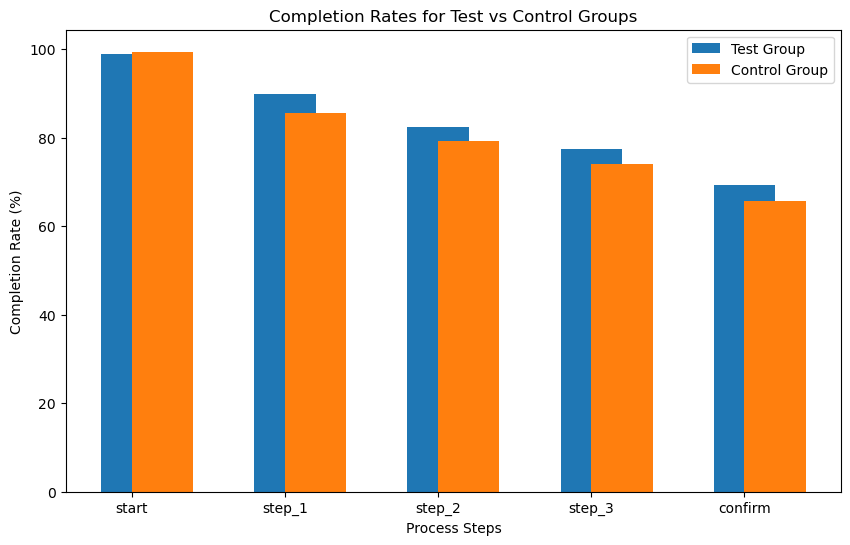

In [38]:
import matplotlib.pyplot as plt

# Completion rates
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
test_rates = [98.93, 89.98, 82.53, 77.43, 69.29]
control_rates = [99.43, 85.64, 79.25, 74.04, 65.59]

# Create a bar chart to compare completion rates
plt.figure(figsize=(10,6))
plt.bar(steps, test_rates, width=0.4, label='Test Group', align='center')
plt.bar(steps, control_rates, width=0.4, label='Control Group', align='edge')
plt.xlabel('Process Steps')
plt.ylabel('Completion Rate (%)')
plt.title('Completion Rates for Test vs Control Groups')
plt.legend()
plt.show()


Null Hypothesis (H₀):
There is no significant difference in engagement between genders with either the new or old process.

Alternative Hypothesis (H₁):
There is a significant difference in engagement between genders with either the new or old process.

In [276]:
df2 = pd.read_csv('new_final_demo.csv')

In [50]:
merged_df = pd.merge(df, df2, on='client_id', how='inner')

unique_clients_df = merged_df.drop_duplicates(subset='client_id')

unique_clients_df = unique_clients_df.dropna()
unique_clients_df['clnt_age'] = np.floor(unique_clients_df['clnt_age']).astype(int)


In [136]:
# Specify the folder path and file name
folder_path = '//Users/ironhack/Documents/GitHub/Week5 EDA/vanguard-ab-test' # Replace with your folder path
file_name = 'unique_clients_df.csv'
full_path = f'{folder_path}/{file_name}'

# Export the DataFrame to CSV
unique_clients_df.to_csv(full_path, index=False)  # index=False to avoid writing row indices

print(f'DataFrame exported as CSV to {full_path}')

DataFrame exported as CSV to //Users/ironhack/Documents/GitHub/Week5 EDA/vanguard-ab-test/unique_clients_df.csv


In [134]:
# Specify the folder path and file name
folder_path = '/Users/ironhack/Documents/GitHub/Week5 EDA/vanguard-ab-test' # Replace with your folder path
file_name = 'merged_df.csv'
full_path = f'{folder_path}/{file_name}'

# Export the DataFrame to CSV
merged_df.to_csv(full_path, index=False)  # index=False to avoid writing row indices

print(f'DataFrame exported as CSV to {full_path}')

DataFrame exported as CSV to /Users/ironhack/Documents/GitHub/Week5 EDA/vanguard-ab-test/merged_df.csv


In [ ]:
#crosstab_F_control = pd.DataFrame(crosstab_yes).reset_index()
#crosstab_M_control = pd.DataFrame(crosstab_no).reset_index()

In [278]:

crosstab_yes['test'] = crosstab_yes['confirm'].apply(lambda x:1 if x > 0 else 0)
crosstab_no['test'] = crosstab_no['confirm'].apply(lambda x:1 if x > 0 else 0)

st.ttest_ind(crosstab_yes['test'], crosstab_no['test'], alternative='two-sided')

TtestResult(statistic=8.881266522192275, pvalue=6.822182086187193e-19, df=50498.0)

In [280]:
#crosstab_F_control = pd.DataFrame(crosstab_yes).reset_index()
#crosstab_M_control = pd.DataFrame(crosstab_no).reset_index()

In [282]:
# Filter for female users in the 'Control' group
filtered_F_control = merged_df[(merged_df['gendr'] == 'F') & (merged_df['Variation'] == 'Control')]
# Filter for female users in the 'Test' group
filtered_F_test = merged_df[(merged_df['gendr'] == 'F') & (merged_df['Variation'] == 'Test')]

# Create a crosstab between 'client_id' and 'process_step' for the filtered users
crosstab_F_control = pd.crosstab(filtered_F_control['client_id'], filtered_F_control['process_step'])
crosstab_M_control = pd.crosstab(filtered_M_control['client_id'], filtered_M_control['process_step'])



crosstab_F_control['test'] = crosstab_F_control['confirm'].apply(lambda x:1 if x > 0 else 0)
crosstab_M_control['test'] = crosstab_M_control['confirm'].apply(lambda x:1 if x > 0 else 0)


# Perform a two-sample t-test 
t_stat, p_value = st.ttest_ind(crosstab_F_control['test'], crosstab_M_control['test'], alternative='two-sided')

# Print the results
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis (H₀): There is a significant difference in engagement between genders with the old process.")
else:
    print("Fail to reject the null hypothesis (H₀): There is no significant difference in engagement between genders with the old process..")


t-statistic: -3.198458818170921, p-value: 0.0013847093462349372
Reject the null hypothesis (H₀): There is a significant difference in engagement between genders with the old process.


In [274]:
# Filter for male users in the 'Control' group
filtered_M_control = merged_df[(merged_df['gendr'] == 'M') & (merged_df['Variation'] == 'Control')]
# Filter for male users in the 'Test' group
filtered_M_test = merged_df[(merged_df['gendr'] == 'M') & (merged_df['Variation'] == 'Test')]

# Create a crosstab between 'client_id' and 'process_step' for the filtered users
crosstab_F_test = pd.crosstab(filtered_F_test['client_id'], filtered_F_test['process_step'])
crosstab_M_test = pd.crosstab(filtered_M_test['client_id'], filtered_M_test['process_step'])

crosstab_F_test['test'] = crosstab_F_test['confirm'].apply(lambda x:1 if x > 0 else 0)
crosstab_M_test['test'] = crosstab_M_test['confirm'].apply(lambda x:1 if x > 0 else 0)


# Perform a two-sample t-test 
t_stat, p_value = st.ttest_ind(crosstab_F_test['test'], crosstab_M_test['test'], alternative='two-sided')

# Print the results
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis (H₀): There is a significant difference in engagement between genders with the new process.")
else:
    print("Fail to reject the null hypothesis (H₀): There is no significant difference in engagement between genders with the new process..")


t-statistic: -5.8597, p-value: 4.72375894269815e-09
Reject the null hypothesis (H₀): There is a significant difference in engagement between genders with the new process.


In [ ]:
crosstab_F_test

In [ ]:
crosstab_F_test['test'].value_counts()

In [ ]:
crosstab_M_test['test'].value_counts()

In [ ]:
merged_df